In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

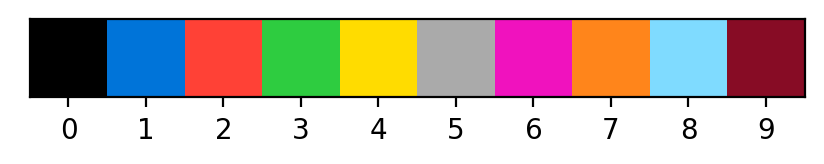

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [10]:
def search_same_output(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    list1=[]
    for x, y in zip(Input,Output):
        if y not in list1:
            list1.append(y)
        else:
            return True
    return -1

25 0


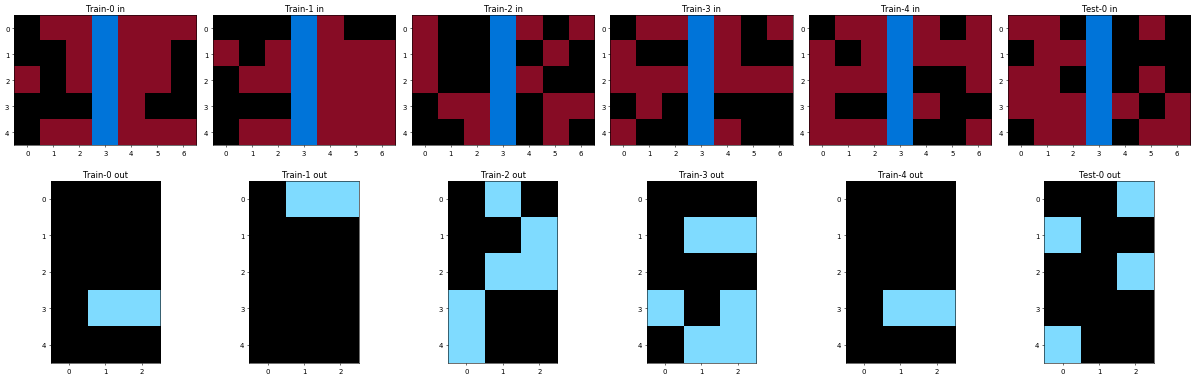

37 0


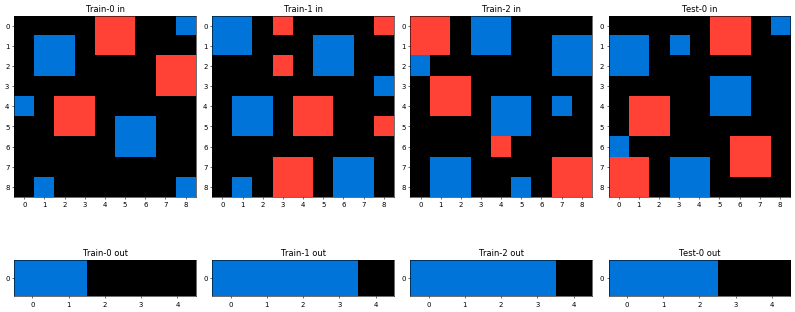

47 0


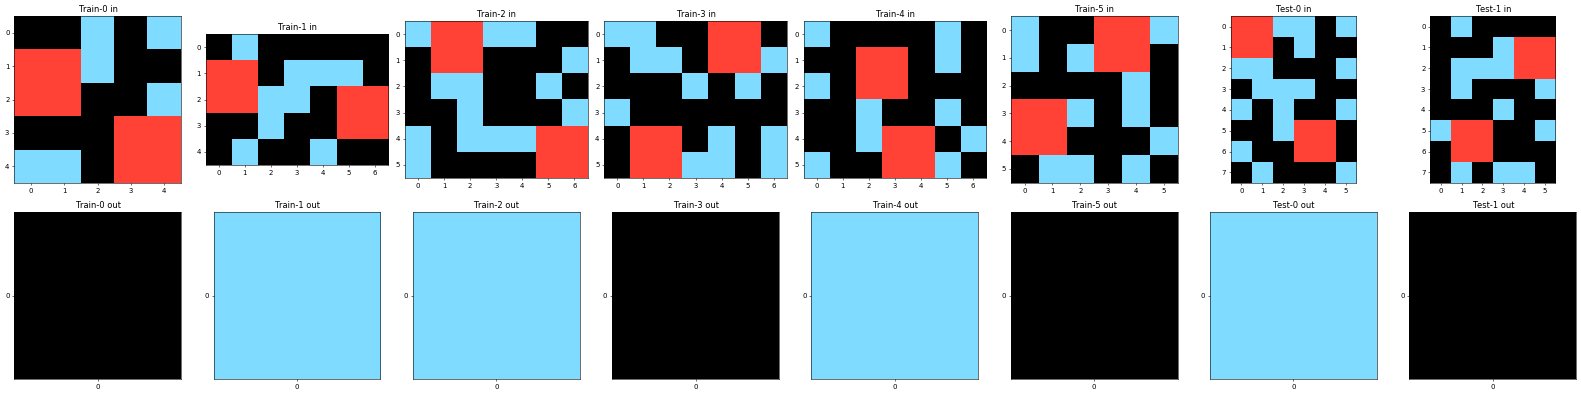

47 1


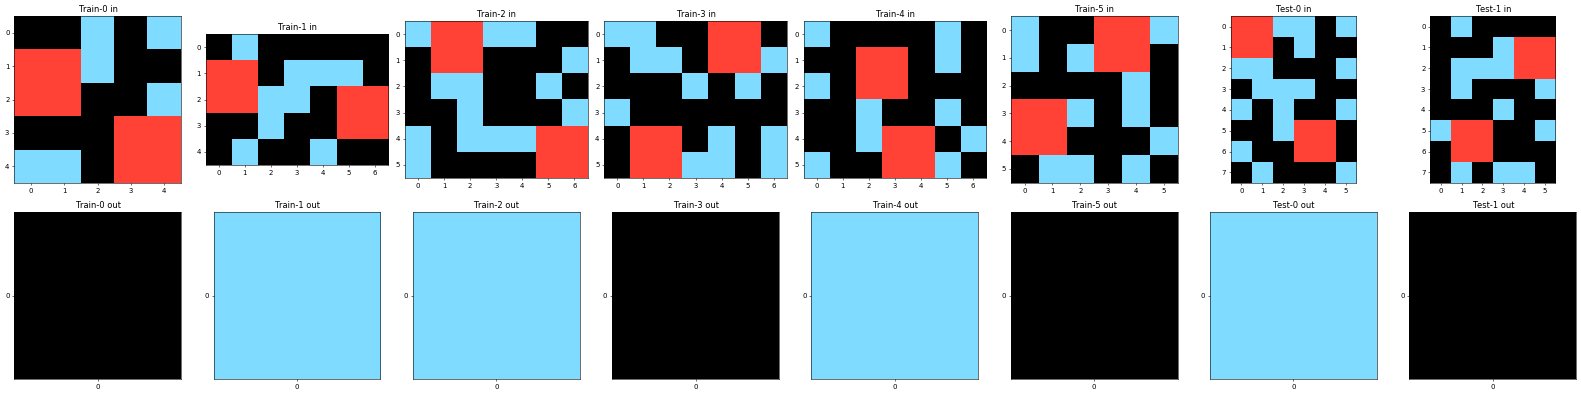

55 0


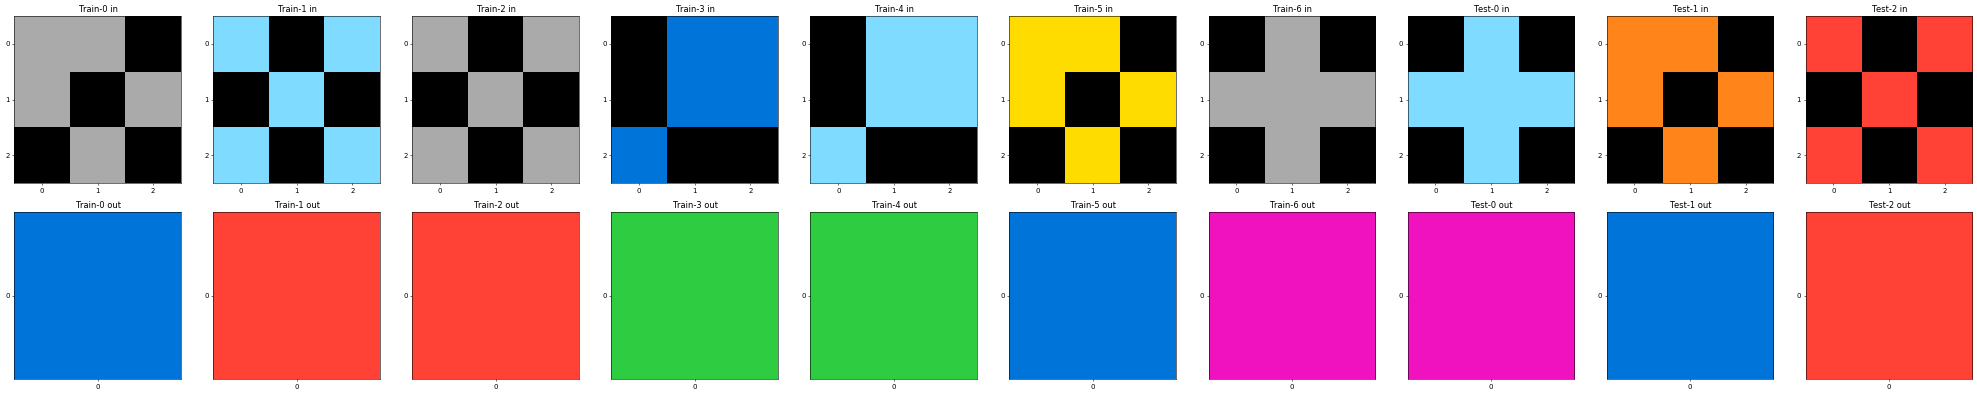

55 1


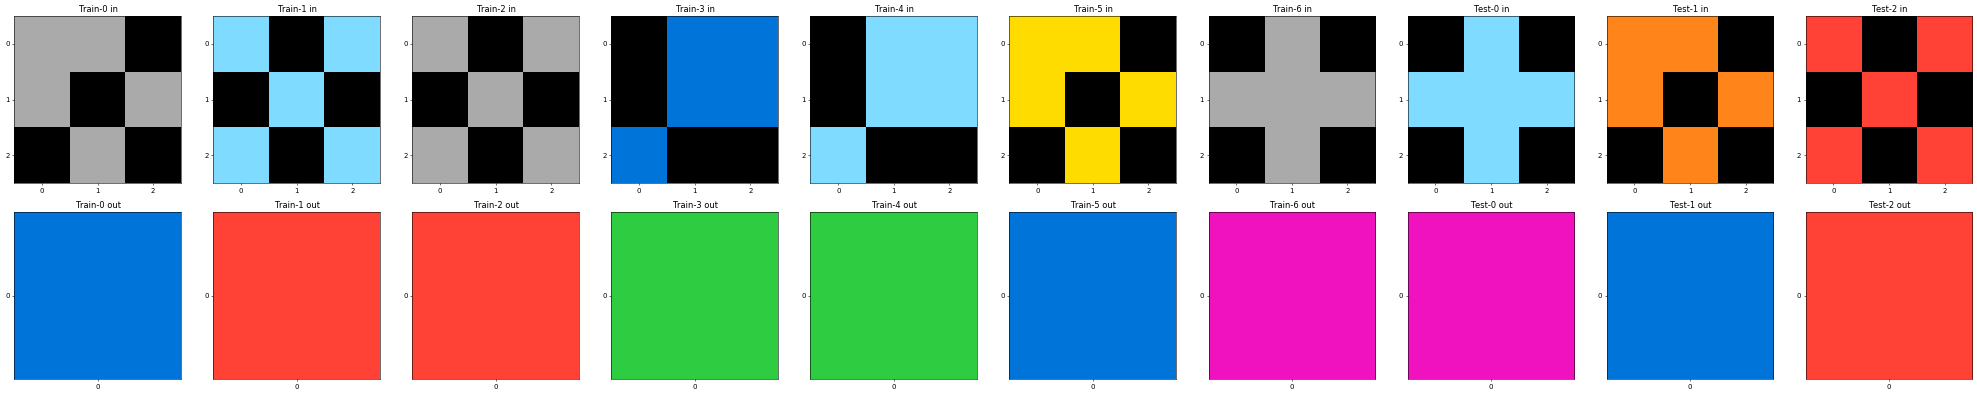

55 2


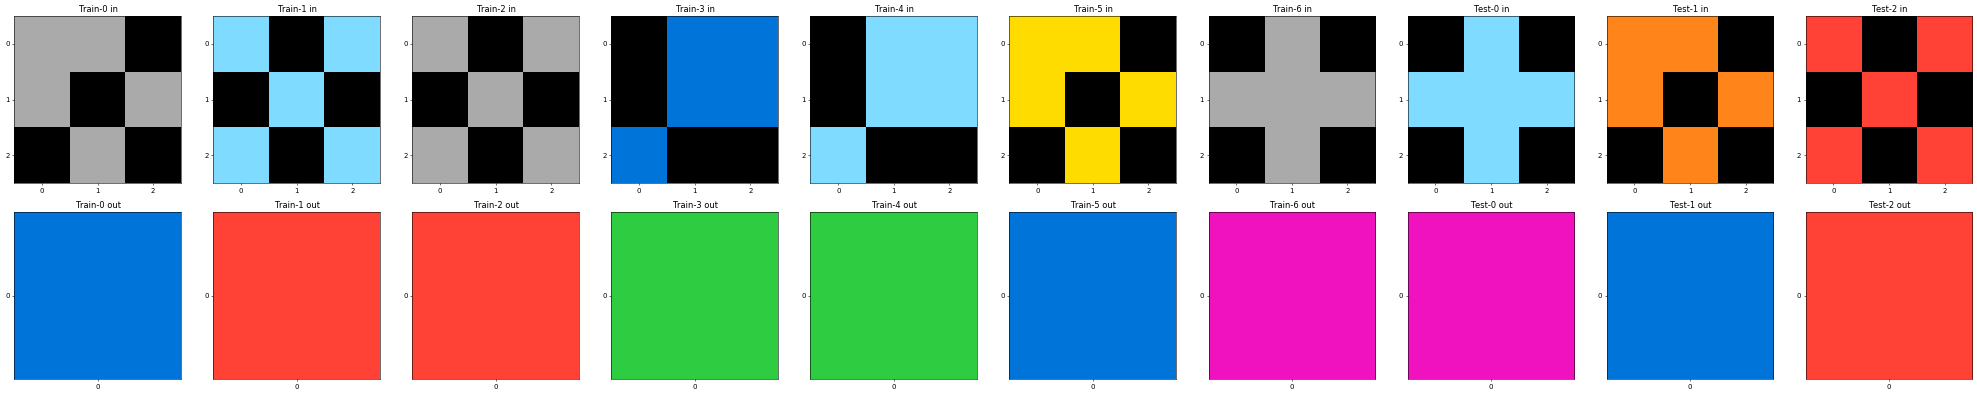

102 0


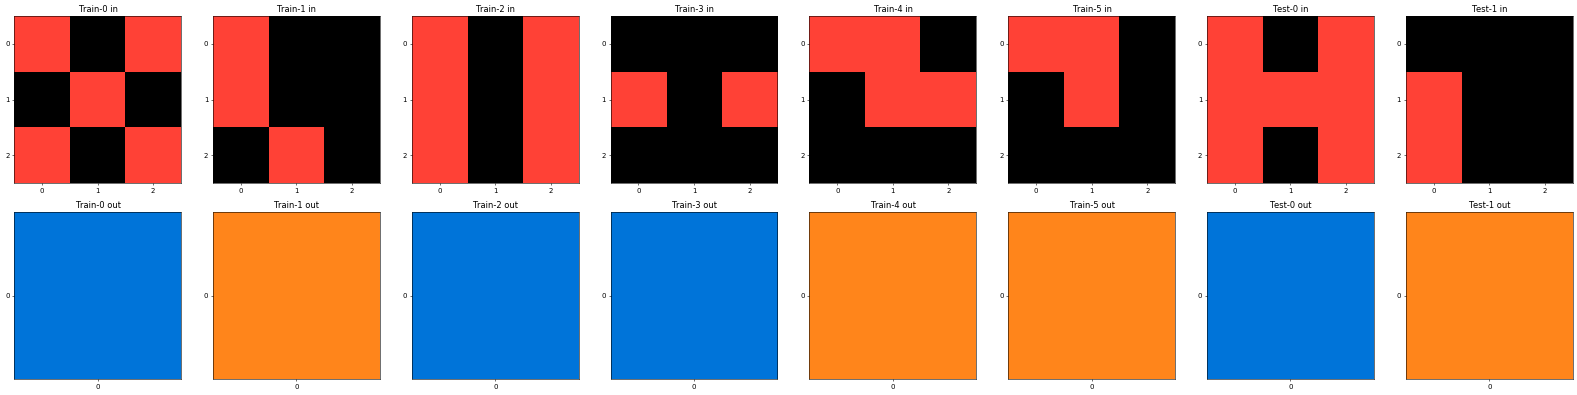

102 1


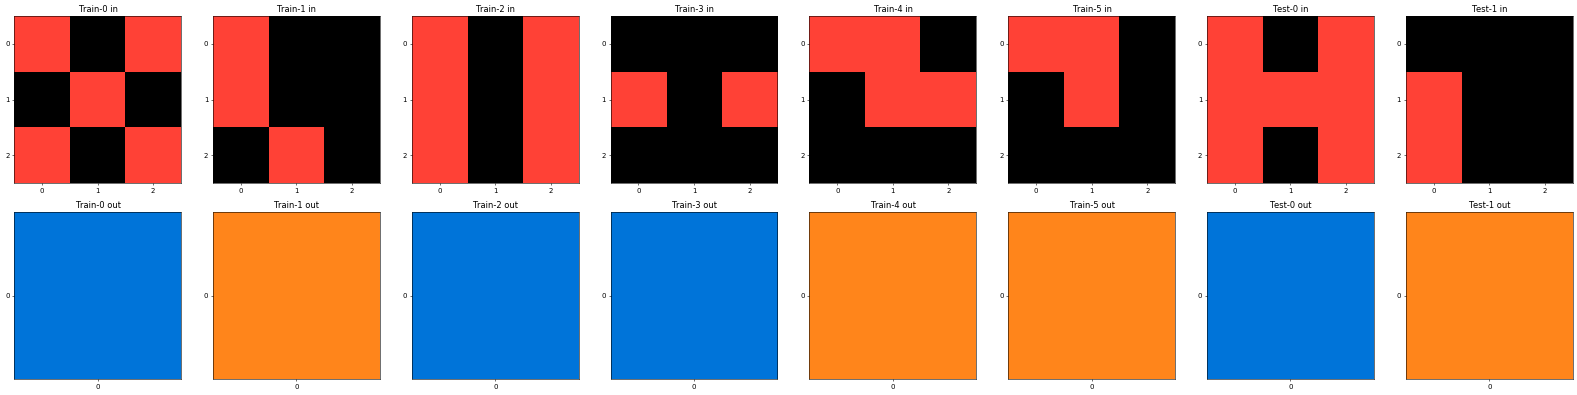

166 0


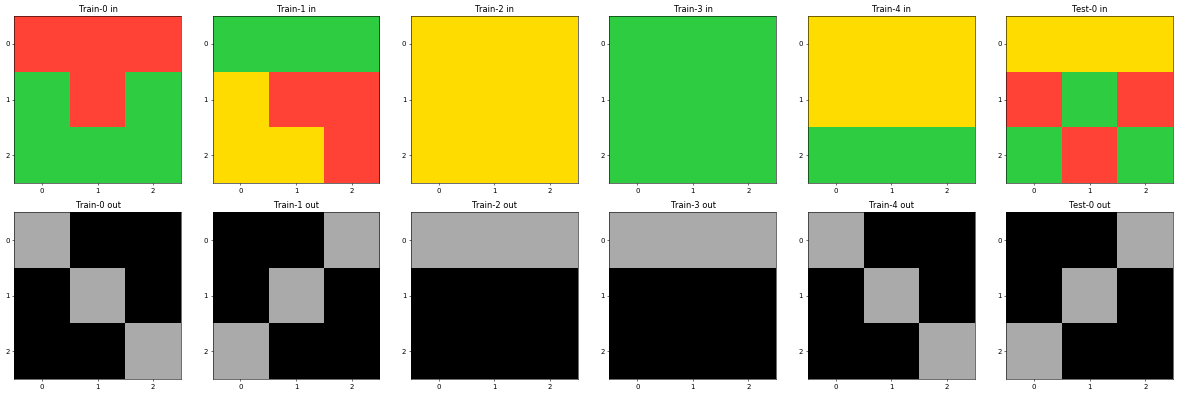

185 0


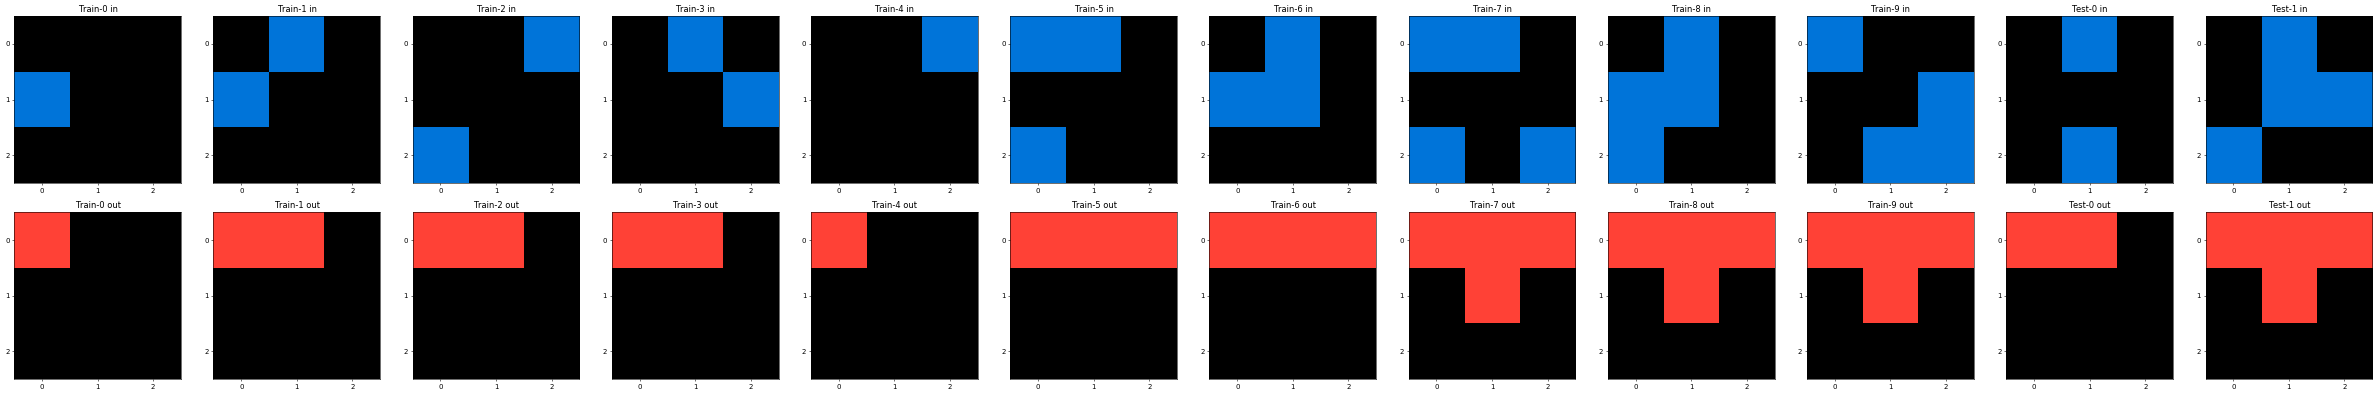

185 1


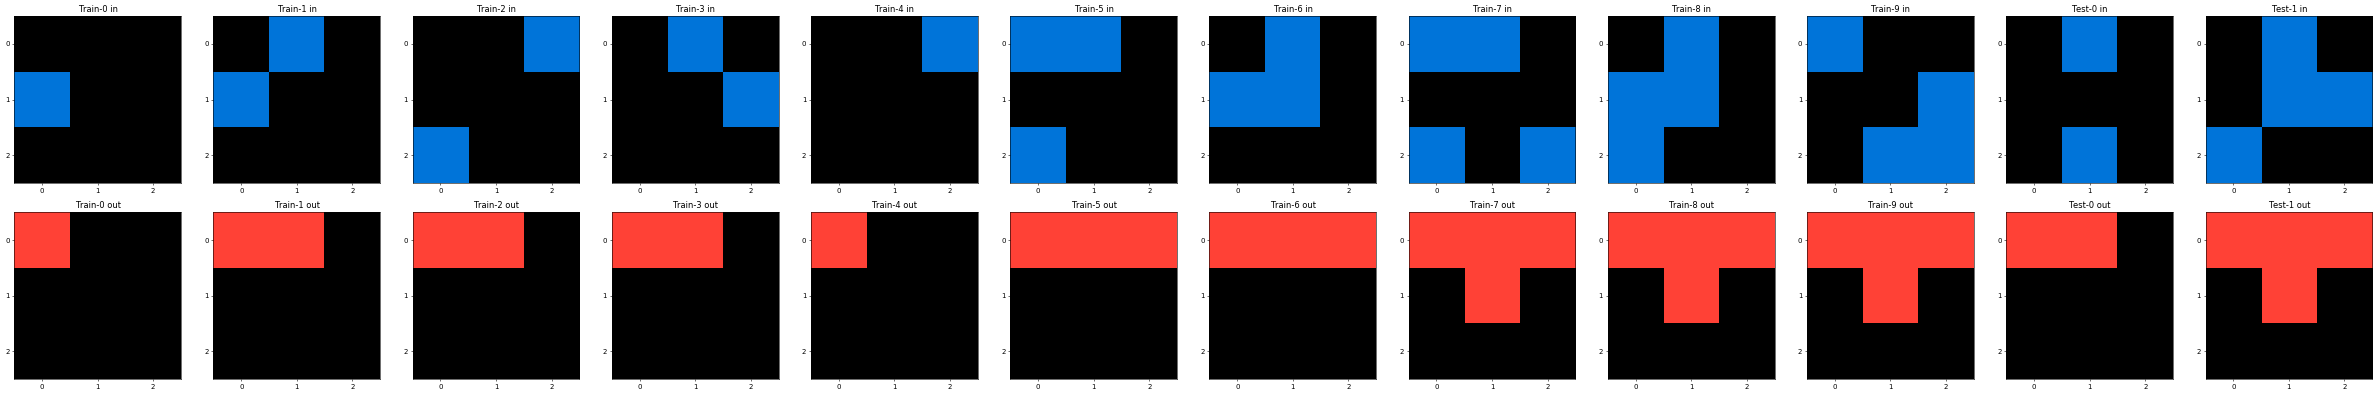

273 0


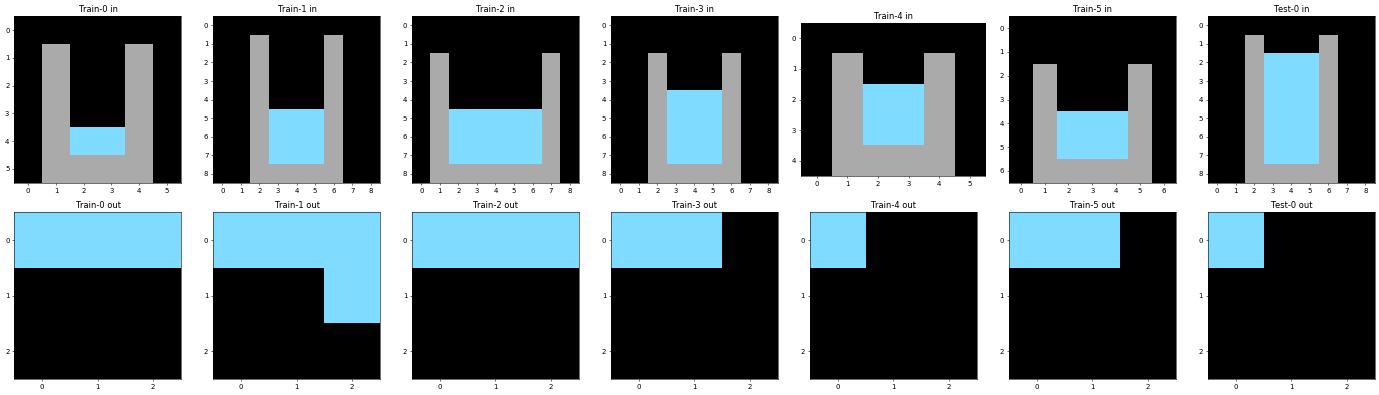

333 0


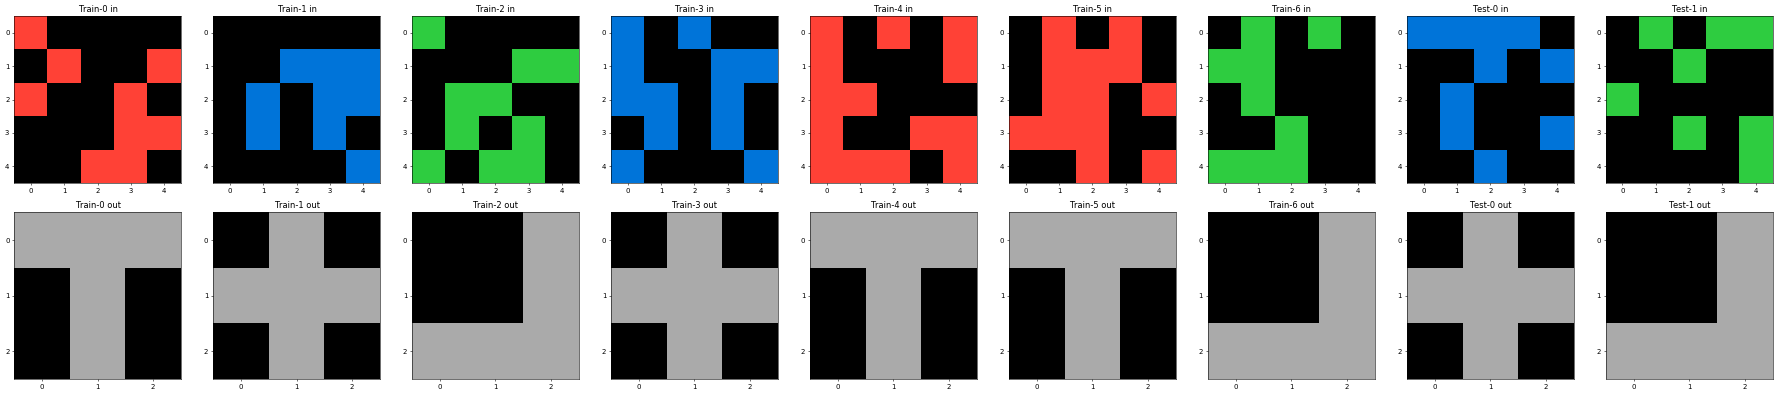

333 1


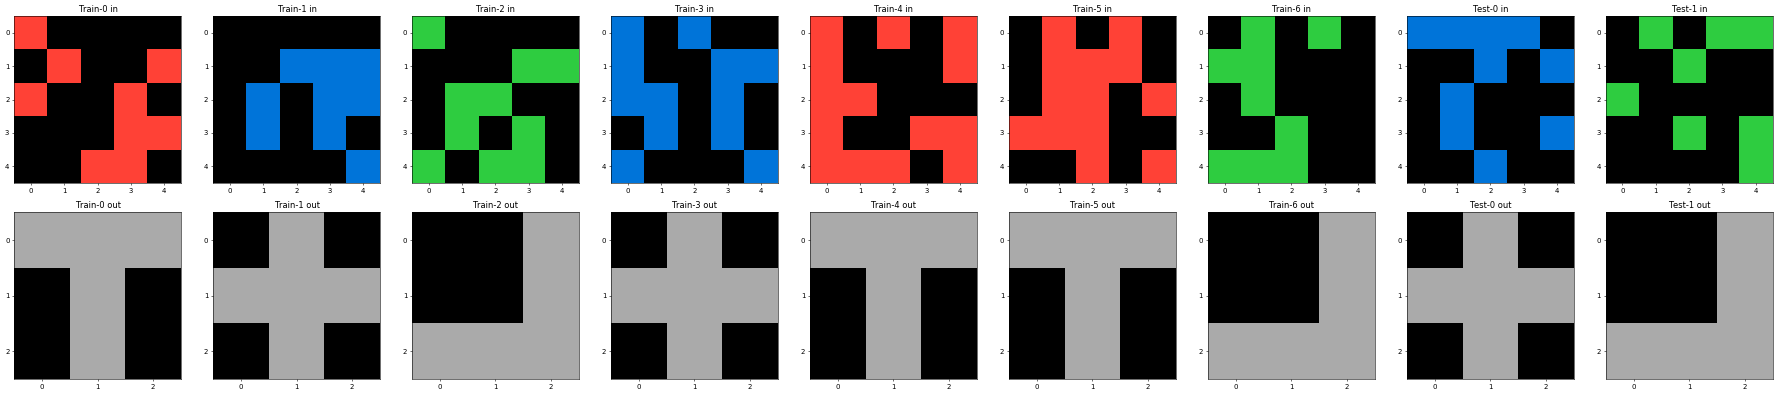

345 0


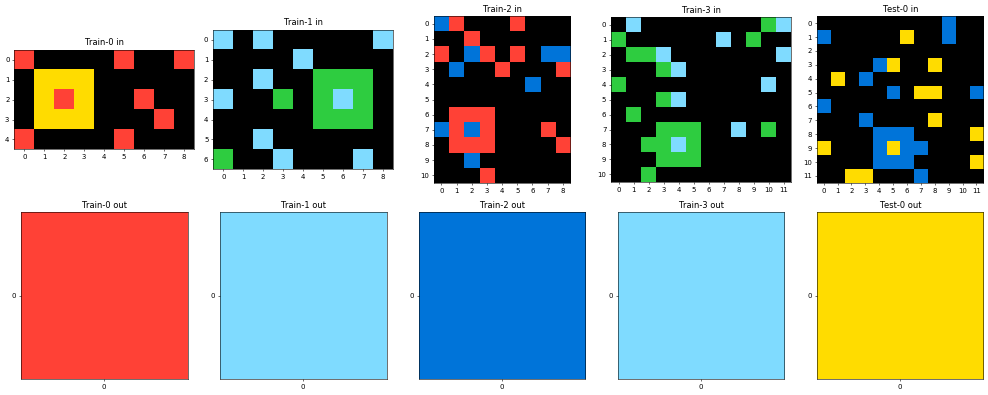

398 0


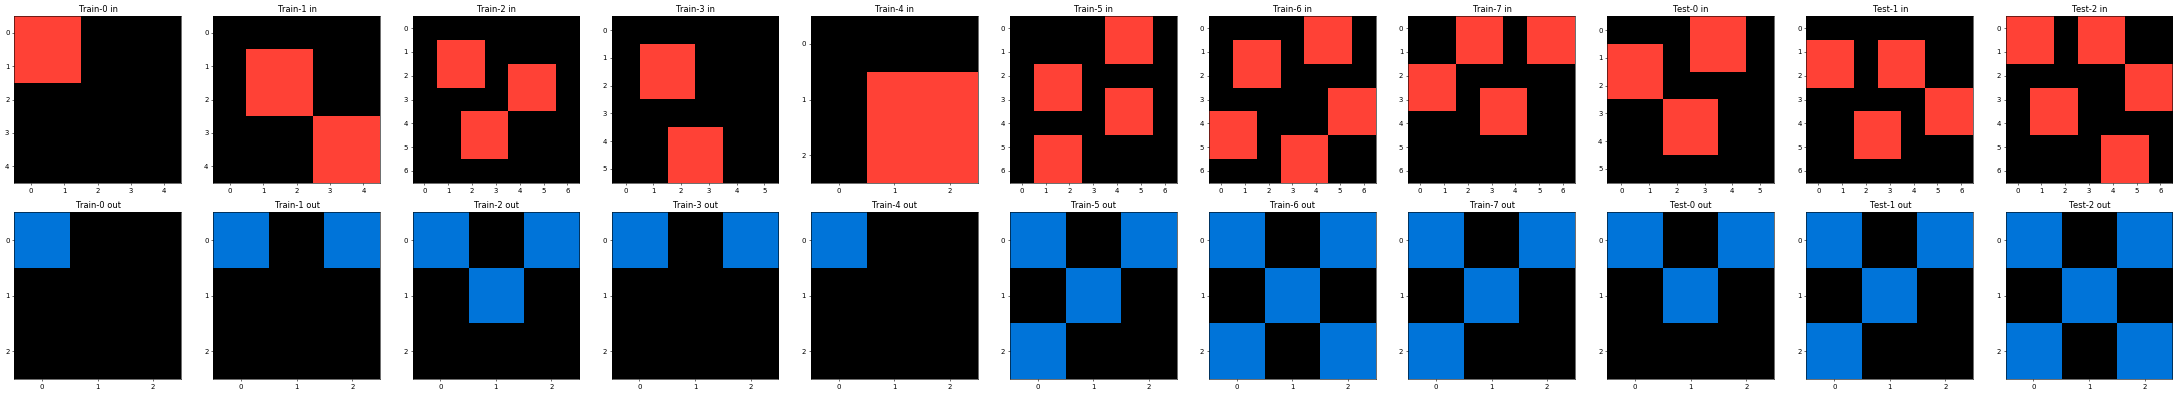

398 1


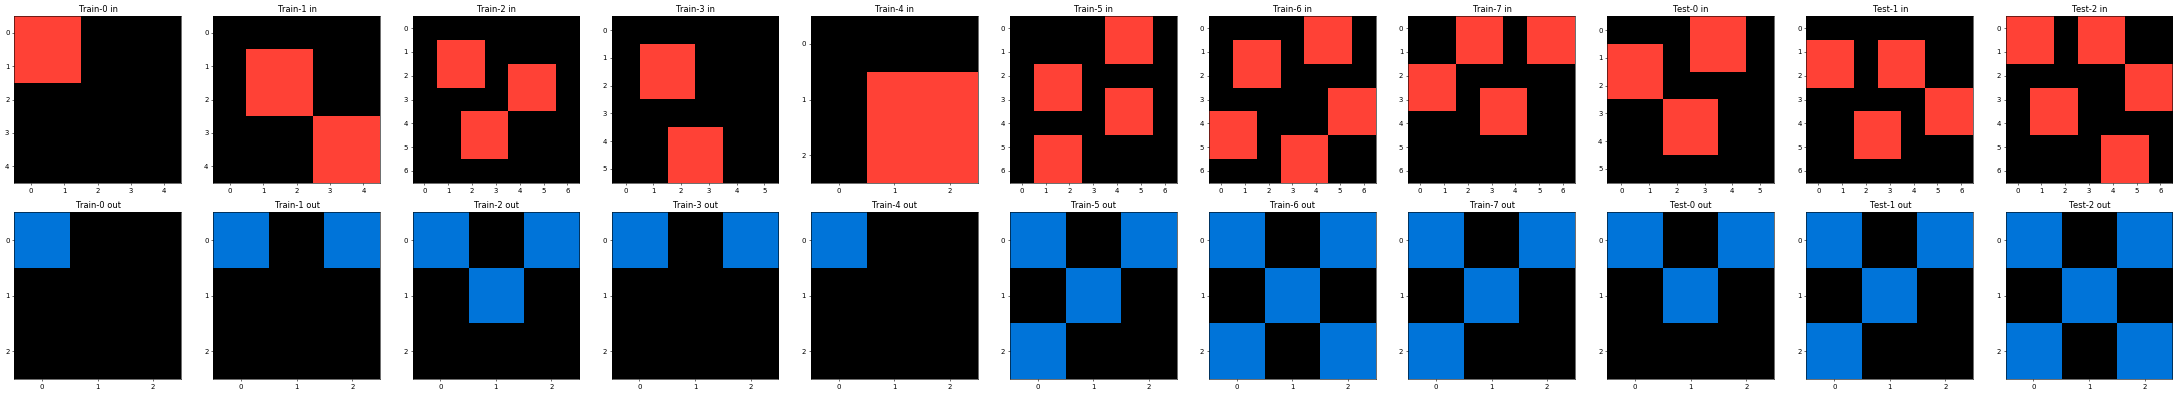

398 2


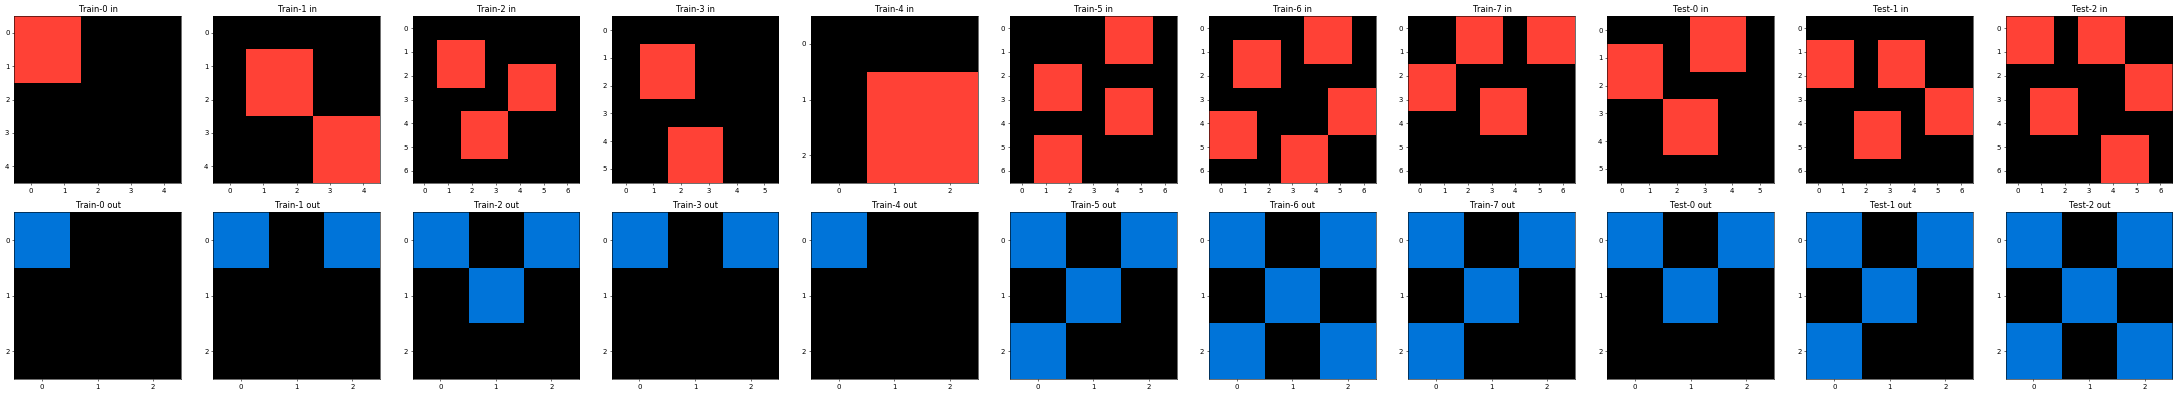

In [13]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = search_same_output(basic_task)
        if proposed_solution != -1:
            print(i,j)
            
            plot_task(task)

In [9]:

def Solve_only_depend_color(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mosaics
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    dict1={}
    solved=False
    for x, y in zip(Input,Output):
        x_color=str(np.unique(x))
        if x_color not in dict1.keys():
            dict1[x_color]=y
        elif dict1[x_color]!=y:
            return -1
        elif dict1[x_color]==y:
            solved=True
    Test_Case_color=str(np.unique(Test_Case))

    if Test_Case_color in dict1.keys() and solved==True:
        return dict1[Test_Case_color]
    else:
        return -1
        

333 0


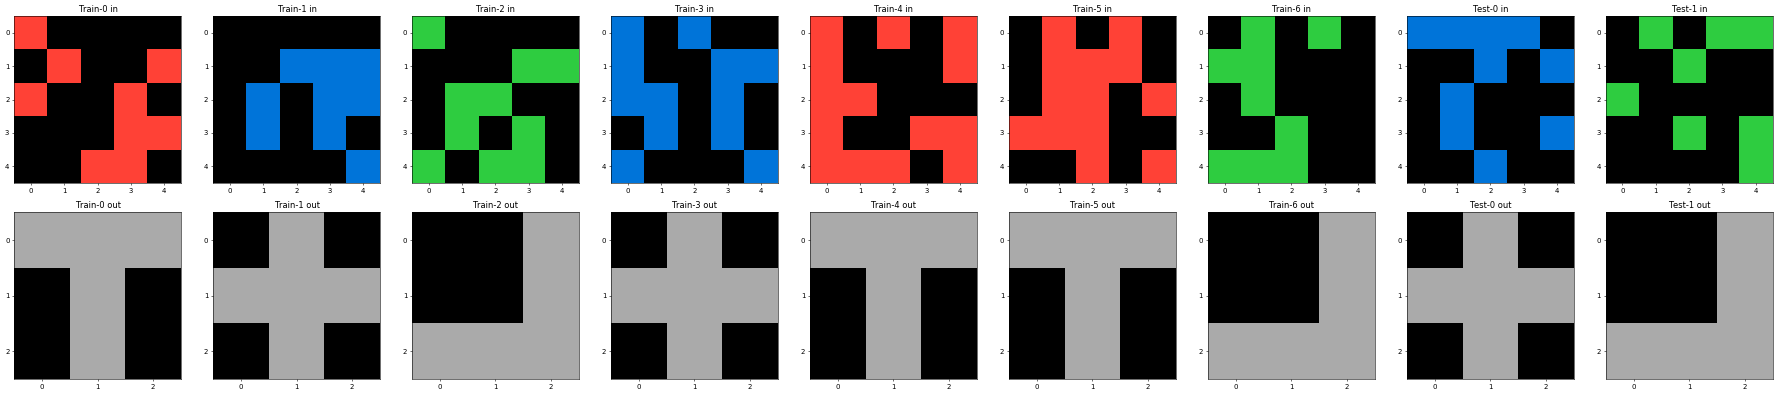

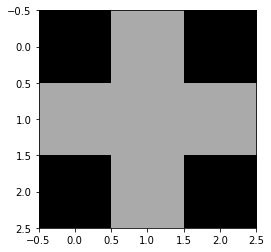

333 1


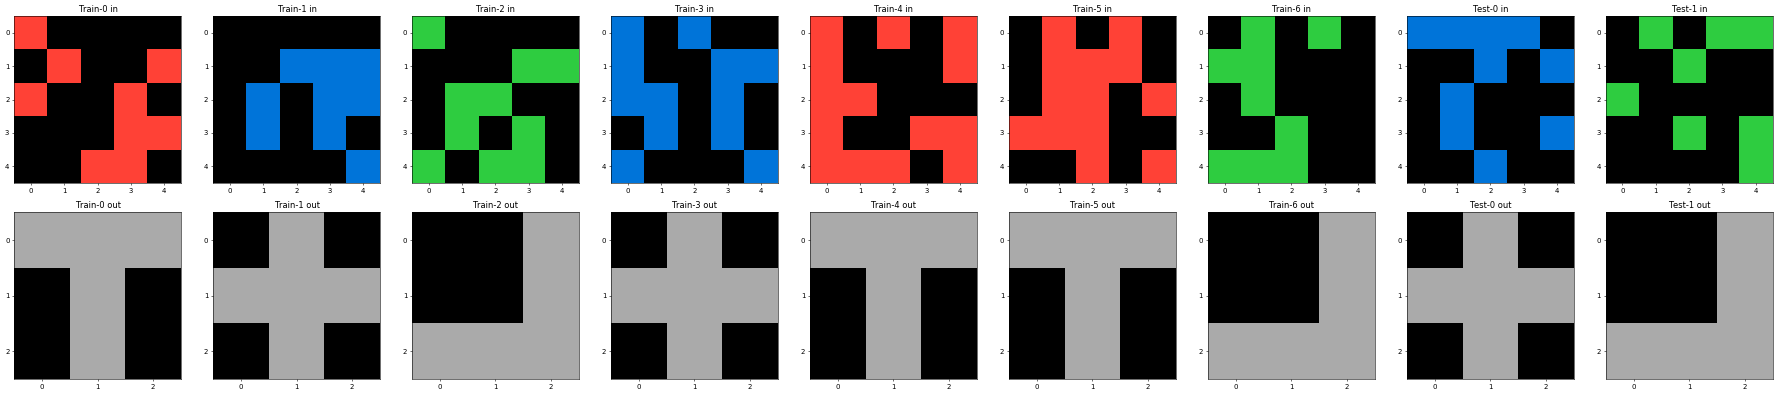

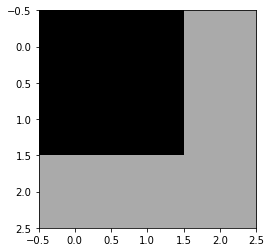

In [10]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_only_depend_color(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_id.add(i)
            plot_task(task)
            
            plot_picture(proposed_solution)

In [11]:
def Solve_only_depend_len_color(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mosaics
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    dict1={}
    solved=False
    for x, y in zip(Input,Output):
        x_color=str(len(np.unique(x)))
        if x_color not in dict1.keys():
            dict1[x_color]=y
        elif dict1[x_color]!=y:
            return -1
        elif dict1[x_color]==y:
            solved=True
    Test_Case_color=str(len(np.unique(Test_Case)))

    if Test_Case_color in dict1.keys() and solved==True:
        return dict1[Test_Case_color]
    else:
        return -1

166 0


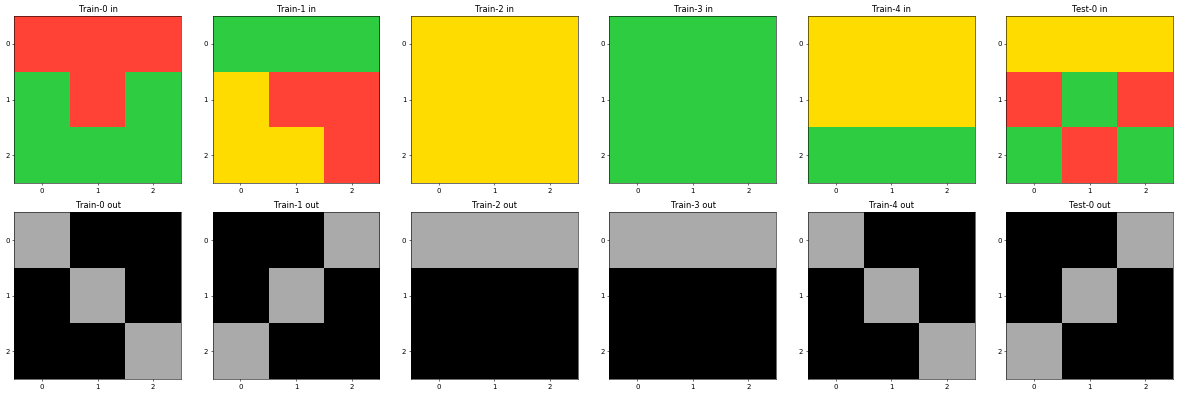

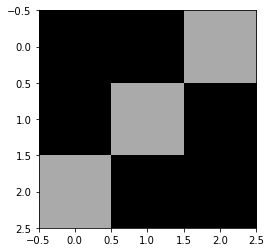

In [12]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_only_depend_len_color(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_id.add(i)
            plot_task(task)
            
            plot_picture(proposed_solution)

In [13]:
def color_counts(a):
    a=np.array(a)
    b = np.bincount(a.flatten(),minlength=10)
    b=b[1:]
    return b

In [14]:
def Solve_only_depend_color_01count(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mosaics
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    dict1={}
    solved=False
    for x, y in zip(Input,Output):
        x_color=str(np.sum(color_counts(x)))

        if x_color not in dict1.keys():
            dict1[x_color]=y
        elif dict1[x_color]!=y:
            return -1
        elif dict1[x_color]==y:
            solved=True
    Test_Case_color=str(np.sum(color_counts(Test_Case)))

    if Test_Case_color in dict1.keys() and solved==True:
        return dict1[Test_Case_color]
    else:
        return -1

102 1


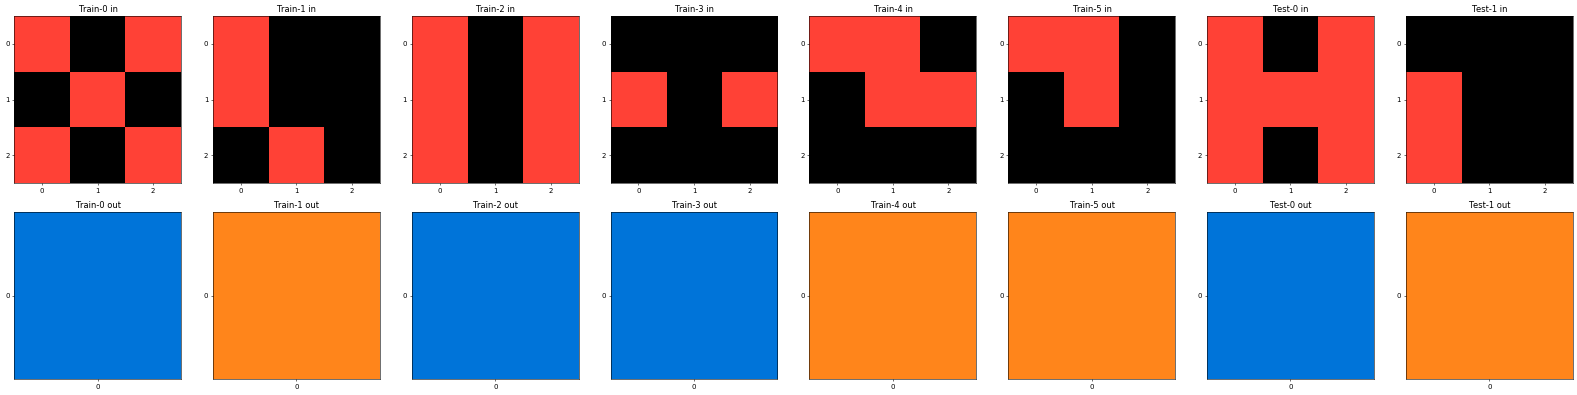

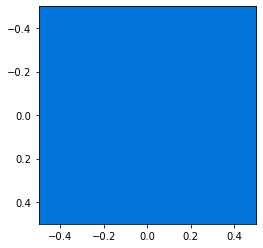

185 0


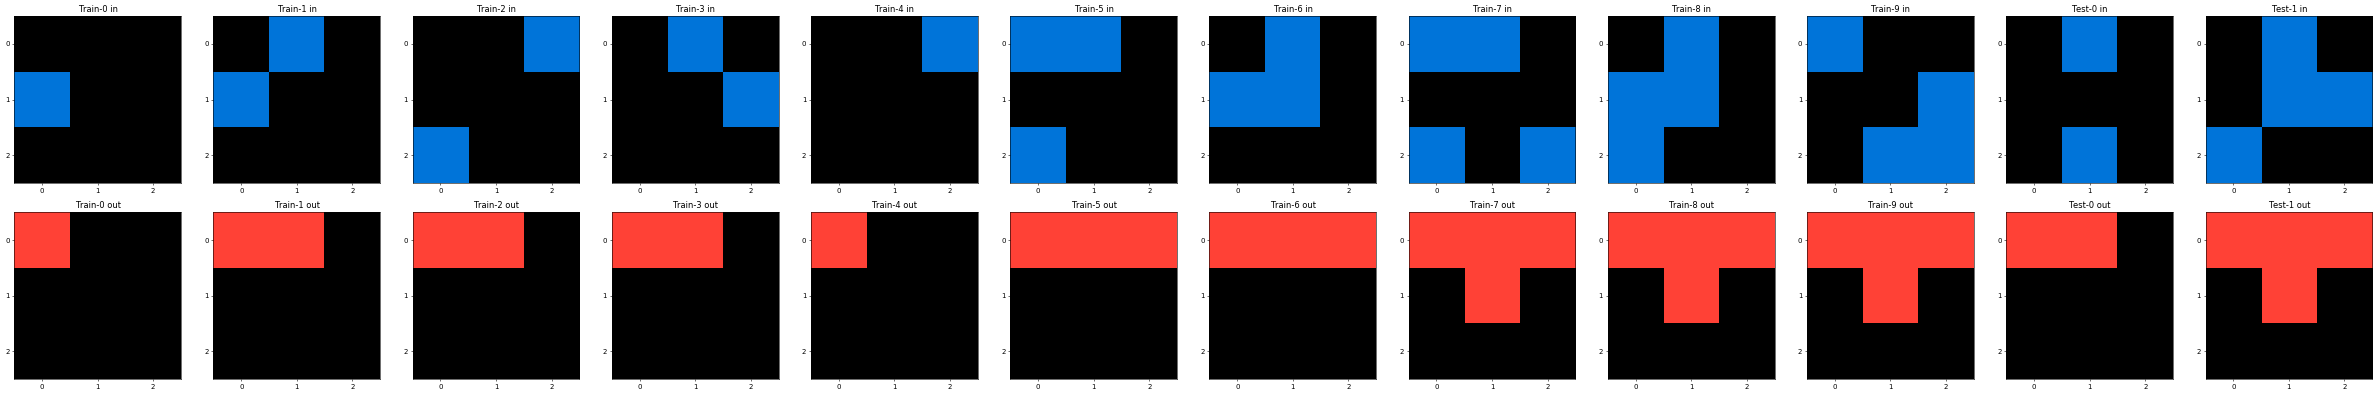

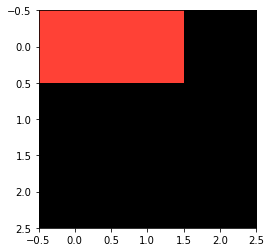

185 1


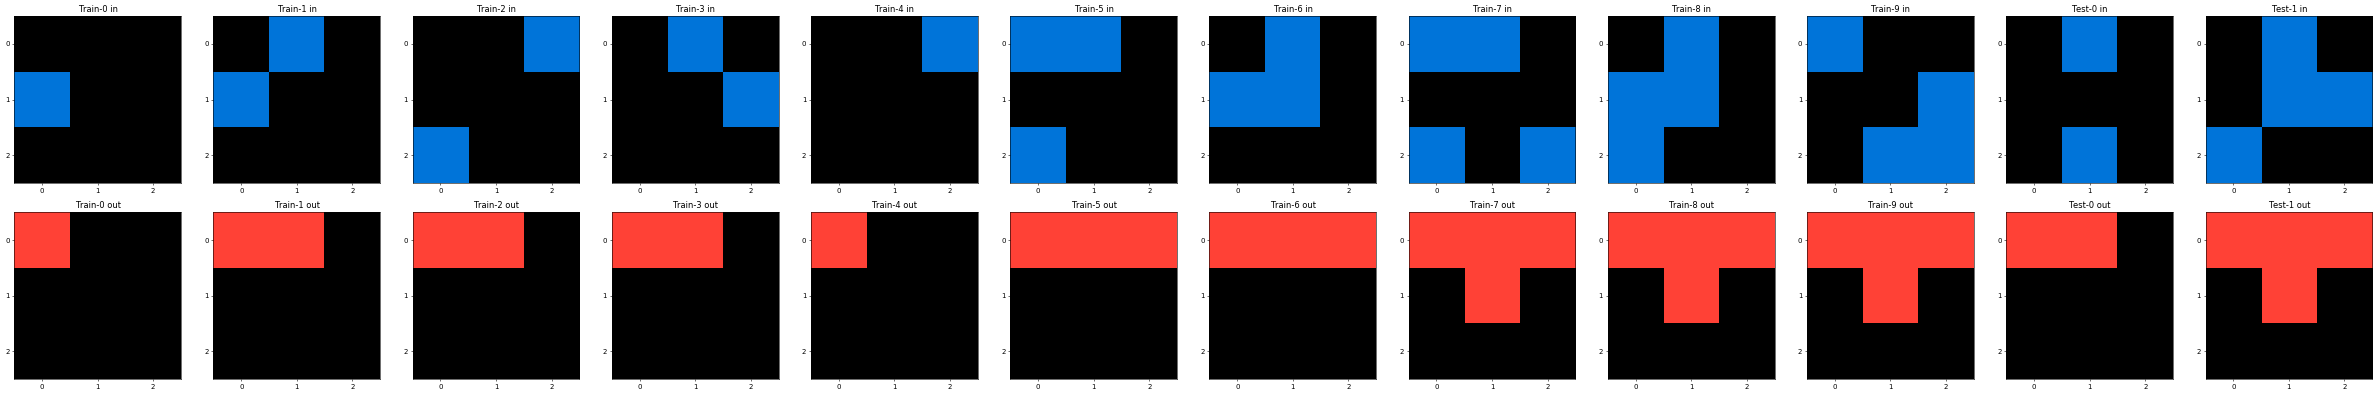

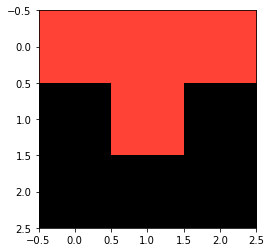

398 0


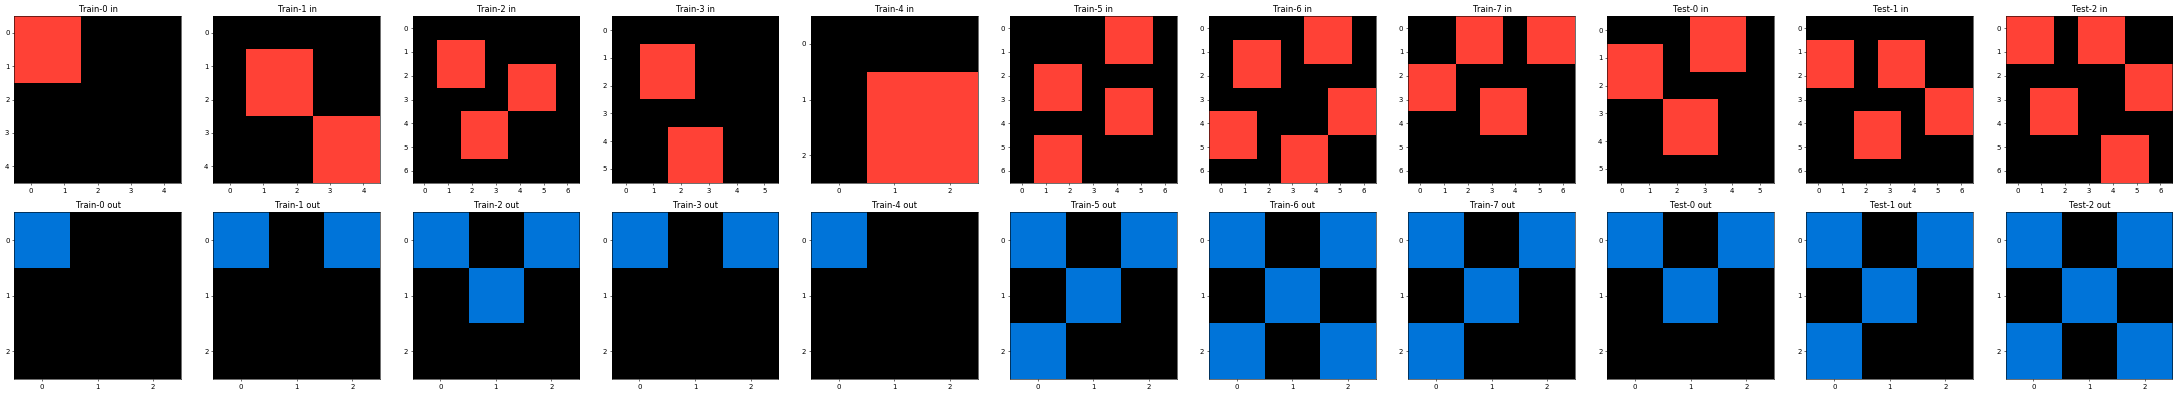

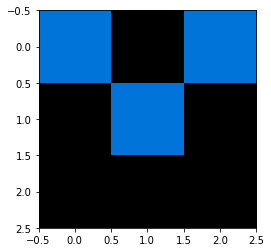

398 1


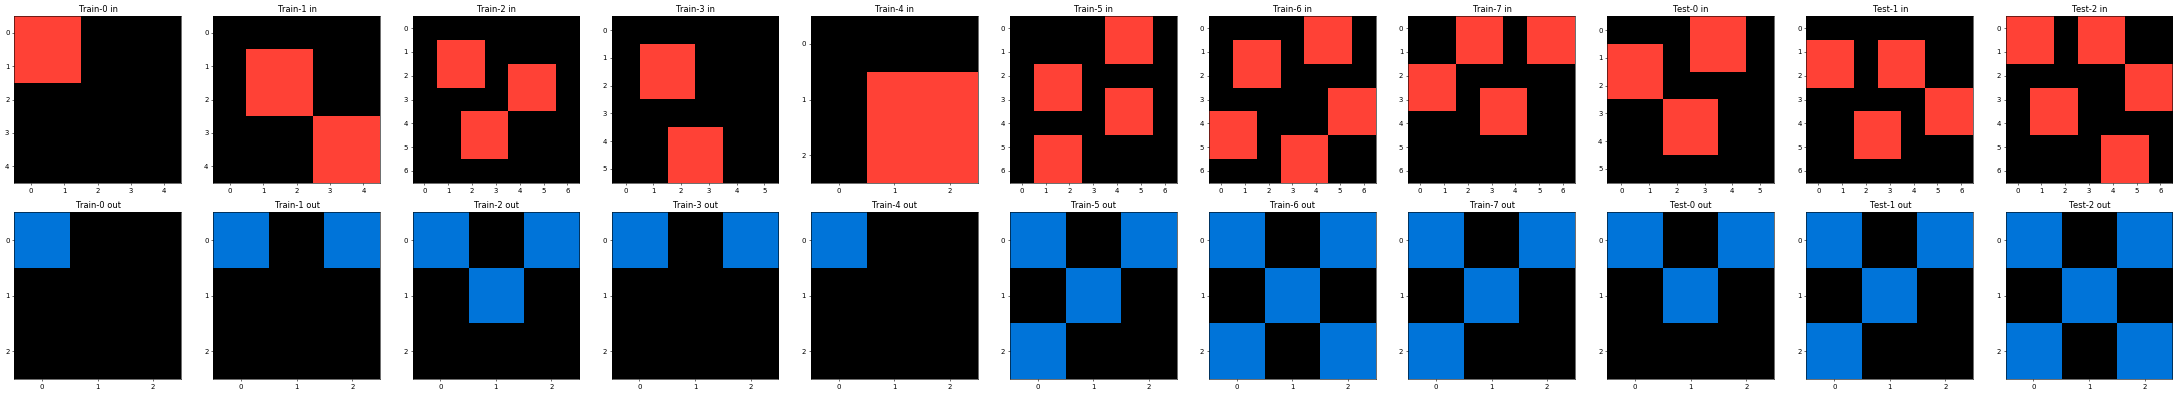

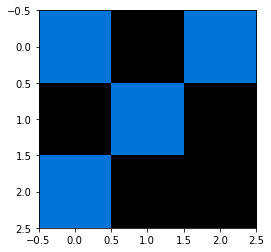

398 2


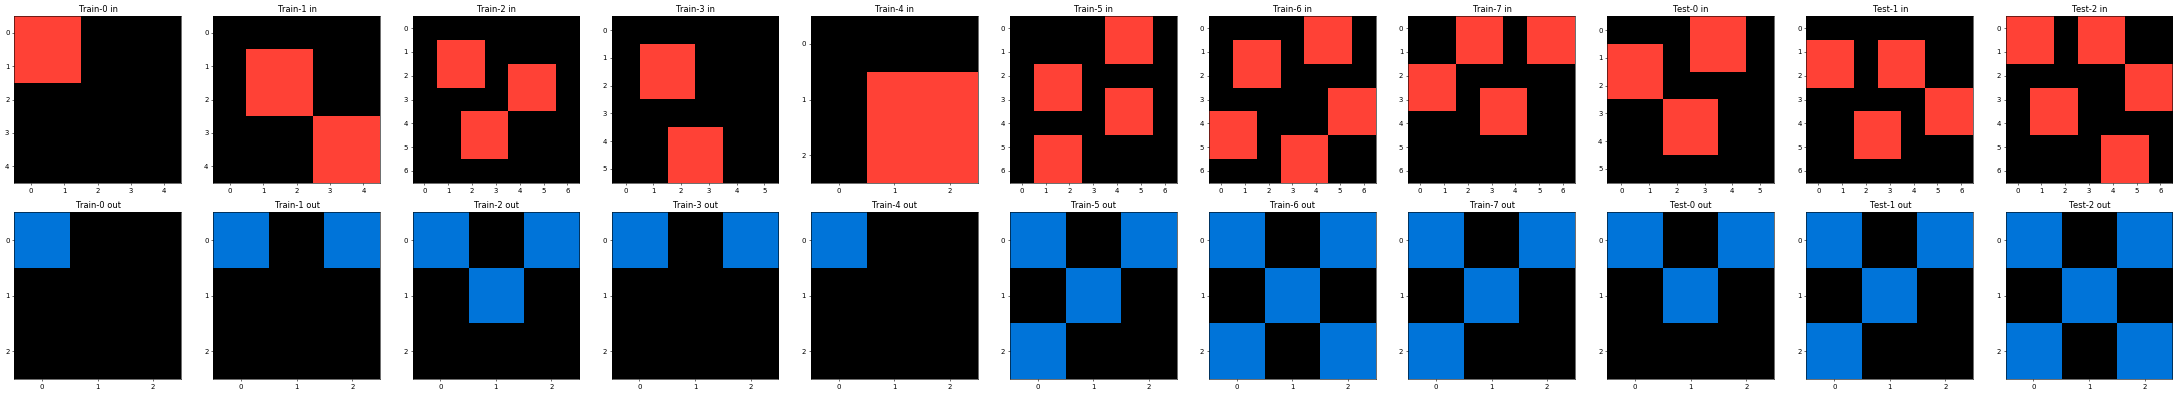

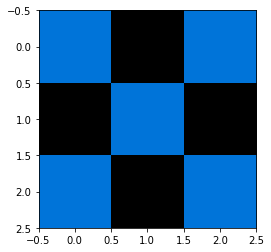

In [15]:
#wrong 101
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_only_depend_color_01count(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_id.add(i)
            plot_task(task)
            
            plot_picture(proposed_solution)

In [16]:
###################################################################

In [17]:
def maxcolor(A):
    A=np.array(A)
    b = np.bincount(A.flatten(),minlength=10)
    b[0] = 500 #???255
    c=np.argsort(b)[-2]
    return c
#no count black

def mincolor(A):
    A=np.array(A)
    try:
        b = np.bincount(A.flatten(),minlength=10)
        b1=np.delete(b,0)
        #b1=b
        c = int(np.where(b==np.min(b1[np.nonzero(b1)]))[0])
        return c
    except:
        return 0

In [28]:

def Solve_only_depend_maxcolor(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mosaics
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    dict1={}
    solved=False
    for x, y in zip(Input,Output):
        x_color=maxcolor(x)
        
        if x_color not in dict1.keys():
            dict1[x_color]=y
        elif dict1[x_color]!=y:
            return -1
        elif dict1[x_color]==y:
            solved=True
    Test_Case_color=maxcolor(Test_Case)
    if Test_Case_color in dict1.keys() and solved==True:
        return dict1[Test_Case_color]
    else:
        return -1
        

217 0


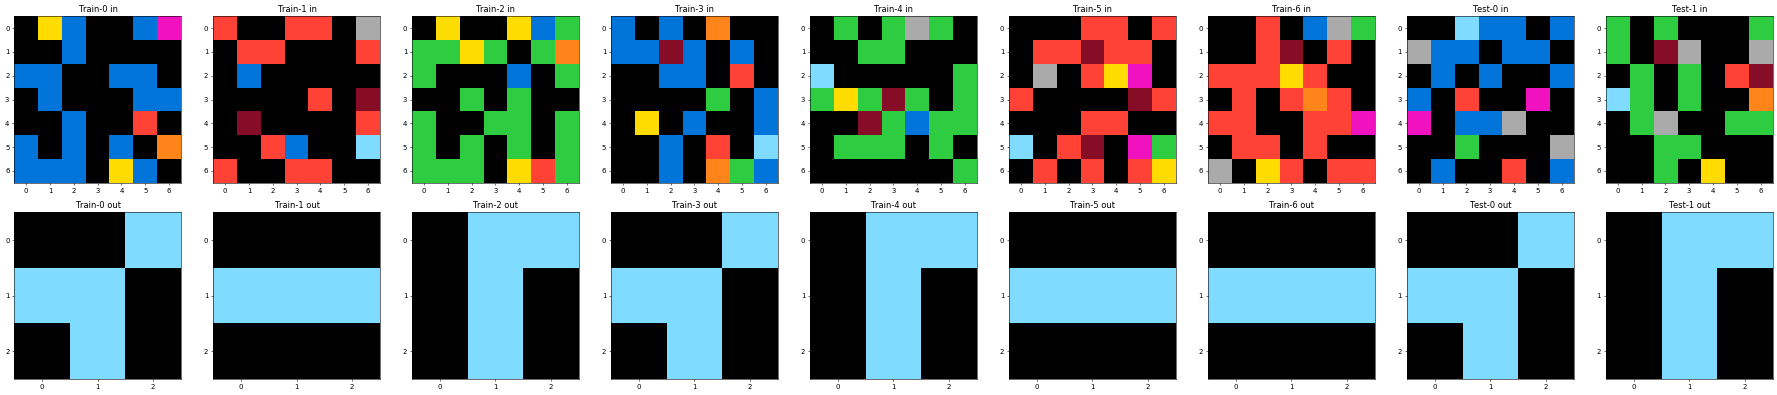

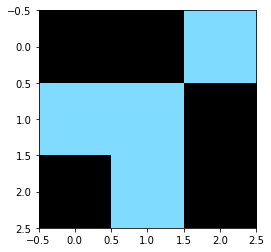

217 1


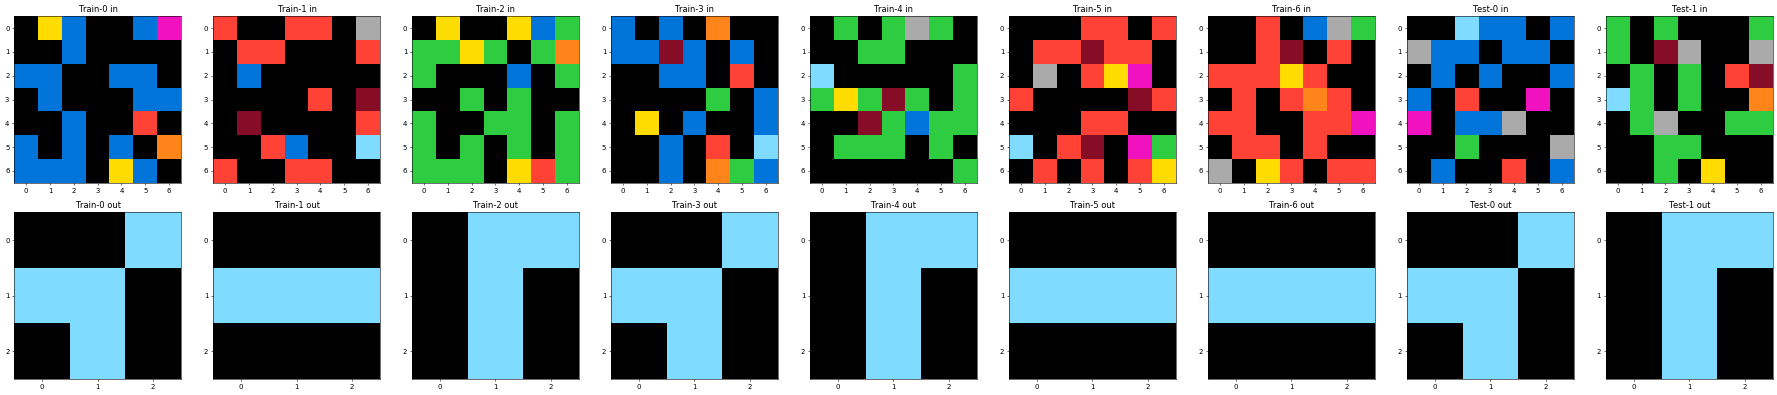

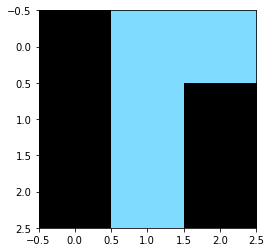

In [30]:
for i in range(400):
    task = Evals[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_only_depend_maxcolor(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_id.add(i)
            plot_task(task)
            
            plot_picture(proposed_solution)

In [32]:

def Solve_only_depend_mincolor(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mosaics
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    dict1={}
    solved=False
    for x, y in zip(Input,Output):
        x_color=mincolor(x)
        
        if x_color not in dict1.keys():
            dict1[x_color]=y
        elif dict1[x_color]!=y:
            return -1
        elif dict1[x_color]==y:
            solved=True
    Test_Case_color=mincolor(Test_Case)
    if Test_Case_color in dict1.keys() and solved==True:
        return dict1[Test_Case_color]
    else:
        return -1
        

333 0


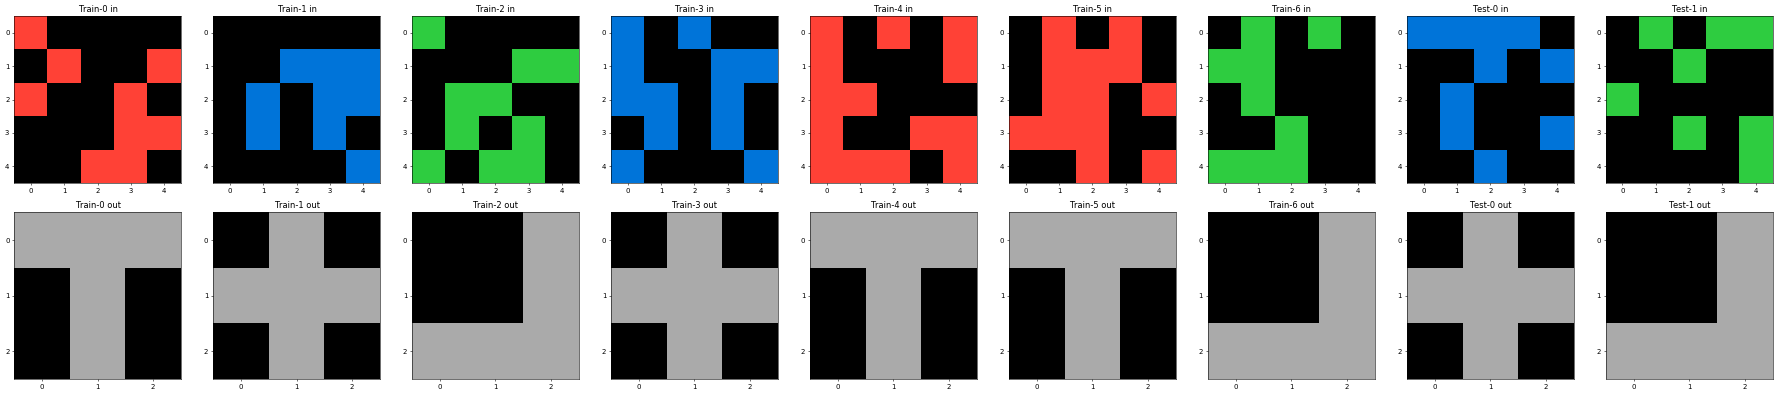

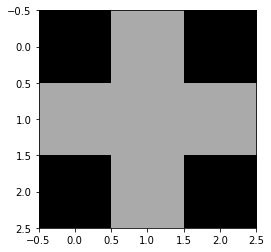

333 1


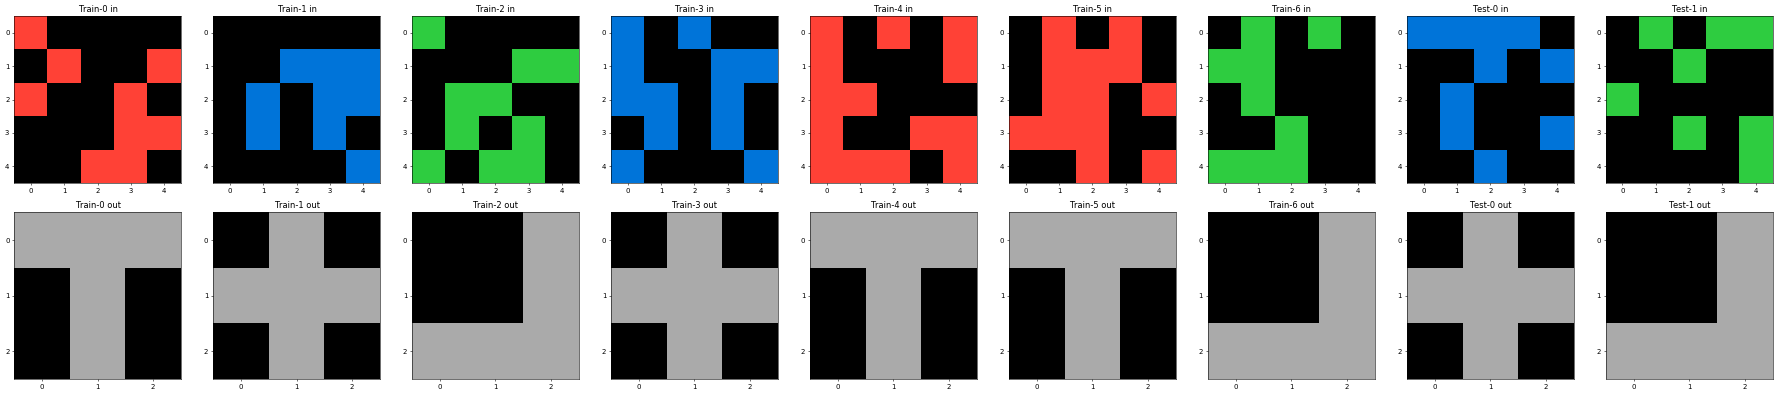

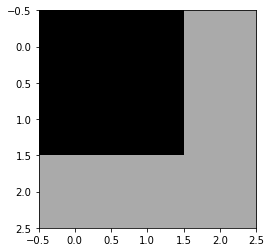

In [34]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_only_depend_mincolor(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_id.add(i)
            plot_task(task)
            
            plot_picture(proposed_solution)